# Spreadsheets are evil

Staying on the theme, you have been given daily stock prices for the fictional company, *Evil Corp* (`evil_corp.csv`). They will need to be downloaded and put into the same directory as this file. You will also need the `trading.csv` file. Your challenge is to then use Python to answer a series of questions that could be calculated with a spreadsheet, but are much less error prone to answer this way.


## Importing

Almost universally the first code cell of a Jupyter notebook is used to load in the libraries required by the following code. This is done by typing `import` followed by the name of the library, one import per line. Two libraries are required here:
* `csv` — For reading in a `csv` files.
* `matplotlib.pyplot` — For plotting a graph of what the stocks look like. The `as plt` part means you can refer to the library as `plt`, rather than giving its full name (`matplotlib.pyplot`) each time.

There is also an extra line `%matplotlib inline` — this is a special Jupyter trick that tells it to plot any graphs inline, just below the cell where they are created, instead of in a seperate window.

In [1]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt


## Q1. Loading

Nearly every data analysis task starts by loading some data, and this one is no different. In this case the data has been provided as a `.csv` file; it stands for _comma seperated values_. It's actually just a text file, which you can open in any text editor. Do so if you want. It's organised as a spreadsheet, one row per line, a comma between each cell. It's an old format: IBM Fortran (a programming language from the 1950s) supported it back in 1972. On punch cards. 11 years before someone thought to give it a name. It has two advantages:
* Everything supports it. Everything. If you find a spreadsheet or data analysis program that does not support it you're almost certainly mistaken, and have actually found a rock or a baby walrus pretending to be a spreadsheet.
* It's simple. All it supports is one 2D table of numbers and text. With simplicity comes reliability.

There is one major disadvantage however: It was only recently standardised, so almost every program has its own slightly different variant. In other words, it will occasionally decide to not work for stupid reasons. Good software has robust code that will adapt and fix whatever weirdness it encounters however, so it's rarely a problem for long.

Your task is to load `evil_corp.csv` into two lists: The first is to contain the date of each price, which is the first column of the csv file, the second the closing price of the stock on that day, which is the second column of the file. To do this you need to follow these steps:
1. Open the file, using the [`open` function](https://docs.python.org/3/library/functions.html#open) (This is a link to its entry in the Python manual, so you can figure out how to use it). Remember that you should close the file with, e.g `fin.close()`.
2. Construct a [csv reader](https://docs.python.org/3/library/csv.html). It's help section includes an example that basically just works!
3. Loop the rows, adding the relevant values to the lists. A csv reader is a *generator* that can be looped like a list; it returns a list representing a single row of cells each time. So you will have a line of code that looks something like `for row in reader:`.

Some hints:
* First row of the `csv` file contains column headings. Make sure you skip them; there are several ways of doing it, mostly involving an `if` statement.
* The data will always load as a string. This is fine for the dates but for the closing price you need to convert to a number. The [`float` function](https://docs.python.org/3/library/functions.html#float) will do this.
* If you're unsure if it worked print out the loaded data and verify visually!

__(3 marks)__

In [2]:
date = []
close = []

with open('evil_corp.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            date.append(row[0])
            close.append(float(row[1]))
            line_count += 1

# 3 marks ****************************************************************


## Q2. Visualisation

The data is loaded, but how do we know it's correct? It's always wise to *visualise*, to look at the state of your program and check it is what you expect. Plus generating graphs is a favourite spreadsheet activity!

Above, `matplotlib` was imported, as `plt`; it makes plotting data really easy. Basically, you just have to call [`plt.plot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) for each line to be plotted followed by `plt.show()` to see them. `plt.plot()` takes two parameters — a list of $x$ values followed by a list of $y$ values. Your task is to plot dates ($x$) against closing price ($y$). The only challenge is that it is unable to process dates; this is easily fixed by using a list containing the numbers `[0,1,...,len(date)-1]` instead of the dates.

The graph resulting from calling just two functions is pretty ugly; now is a good opportunity to practise making it less so (this is not marked, but strongly encouraged!). Some tricks:
* It will appear inline below the cell where it was created, but quite small. If you call `plt.figure(figsize=(<width>, <height>))` first that will start a new figure with the given size. The unit is in inches for some strange reason, with 1 inch equal to 100 pixels, so a good value depends on the resolution of your monitor. Around $12-16$ for width and $3-4$ for height works well here.
* By default it automatically sets the range of the axes based on the provided data. You can set it yourself with `plt.xlim(low, high)`, and similarly for $y$. This allows you to tighten up the x-axis and add some head room on the y-axis, which looks nicer.
* If you want to label an axis you can call `plt.xlabel('my label')`. Same for $y$.
* The main weakness with the graph is it shows numbers instead of dates. You can replace the numbers with your own by calling `plt.xticks(<list of positions>, <list of labels>)`. Don't put too many ticks on the graph as it will get messy, e.g. you can index a list with `[::90]` to only show every $90^\texttt{th}$ day. Because dates are quite long you may want to consider rotating them: Adding `rotation=-45` as a keyword parameter to the `xticks()` call looks quite nice.

__(2 marks)__

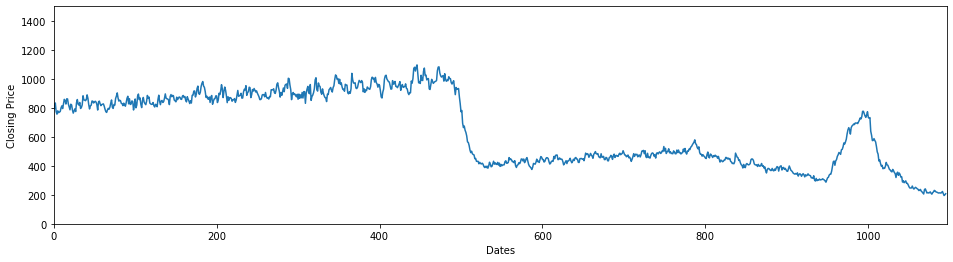

In [3]:
chartdates = []
count = 1

while count <= len(date):
    chartdates.append(count)
    count += 1

interval = 60
chartlabels = date[::interval]

min = 0
max = len(date)+1

plt.figure(figsize=(16,4))
plt.xlim(0,1096)
plt.ylim(0,1500)
plt.xlabel('Dates')
plt.ylabel('Closing Price')

chart = plt.plot(close)

                   
# 2 marks ****************************************************************


## Q3. Calculations

Note: I'm not a finance person. Think the below is correct but there were definitely contradictions between sources when I Googled!

The *return* for a time period is simply how much money you have at the end minus how much you had at the beginning. For instance, assuming you invest $30$ when the stock costs $3$ you get $10$ shares (while fractional shares exist they are rare). If you then sell them at $4$ you get $40$ back, for a *return* of $40 - 30 = 10$. As the return is hard to judge (size of initial investment matters) it is usually given as a percentage of the original cash injection, e.g. $\frac{10}{30} = 33.3\%$. Because of that final division the original investment is irrelevant for the percentage version.

A marginally more complex thing to calculate is the *Sharpe ratio*. It is effectively the expected profit scaled down by how much risk you're taking. We can define the daily return, $r_t$, as

$$r_t = \frac{v_t}{v_{t-1}} - 1$$

where $v_t$ is how much the stock is worth (closing price) on day $t$. The Sharpe ratio is then

$$\texttt{Sharpe ratio} = \frac{\sqrt{y}\operatorname{E}\left[r - b\right]}{\sqrt{\operatorname{Var}(r)}}$$

for some time period. This could be the period when an investor _held a position_, such that $\texttt{open} \leq t \leq \texttt{close}$ (as in opening the position and closing the position; different from the opening and closing price of a stock each day, despite often being abbreviated the same way!), or it could just be for an arbitrary period of time when judging a company. The $\sqrt{y}$ term scales it up by $y$, the number of trading days in the year, so the value can be interpreted as being annual. For the purpose of this exercise every day is a trading day, so $y = 365$. $b$ is a baseline return, typically something safe. For the purpose of this exercise $b = 0$, i.e. we're assuming that the only safe option is keeping the money under your mattress.

Investors consider the Sharpe ratio to be a particularly important value, as it combines risk and profit; common advice is that the Sharpe ratio should be above $1$, with anything above $3$ considered to be super good (There are plenty of objections to this. Starting with it being based on the same assumptions that in part caused the 2008 financial crash. Subtracting percentages is also super weird.).

Having looked at the graph it's obviously going to be bad (negative), but calculate the *return* (as raw cash and as a percentage) and *Sharpe ratio* for the entire time period that has been provided, assuming an initial investment of 23628.90.

Hints:
* The square root of $x$ in Python is `x**0.5`
* Break it down! Don't try and do everything above all at once.
* You can't calculate the daily return for the first day, so drop it from the Sharpe ratio.
* You can write the loops to calculate mean / variance with either `range` or `zip`.

__(2 marks)__

In [19]:
trading_day = 365
invested = 23628.90
ret_cash = 0.0
ret_ratio = 0.0
total_r = 0.0
exp = 0.0
var = 0.0

total_shares = invested / close[0]

for i in range(1, len(close)):
    r = (close[i]/close[i-1])-1
    total_r += r
    exp = total_r/len(close)
    var += ((r-exp)**2)/len(close)
          # 2 marks ****************************************************************    
        
sharpe = ((trading_day**0.5)*exp)/(var**0.5)

ret_cash = (total_shares*close[-1]) - invested
ret_ratio = ret_cash / invested
    
print('Return (cash) = {:.02f}'.format(ret_cash))
print('Return (percent) = {:.0f}%'.format(100*ret_ratio))
print('Sharpe ratio = {:.02f}'.format(sharpe))

Return (cash) = -17411.40
Return (percent) = -74%
Sharpe ratio = -0.25


## Q4. Profit, maybe

`trading.csv` contains information on four people who *held a position* on the company; that simply means they owned some shares for a while. Calculate both kinds of return and the Sharpe ratio for each of them and `print()` it out.

Hints:
* You can convert a date into an index using, e.g. `date.index('1986-04-20')`.
* To print the output use `print('{}: return (cash) = {:.02f}; return (percent) = {:.0f}%; Sharpe ratio = {:.02f}'.format(name, ret_cash, 100*ret_ratio, sharpe))` (this ensures that the auto marker can find your answer).
* Note that start—end dates are both inclusive, when Python uses inclusive—exclusive.
* If you know finance you might realise that you really want to calculate the ex-post variation, rather than the ex-ante definition given above. But please stick to the above definition — this exercise is not really about finance and there is nothing to be gained from explaining yet another concept! (the auto marker expects the above)

__(3 marks)__

In [20]:
name_list = []
invested_list = []
open_date_index_list = []
close_date_index_list = []
ret_cash_list = []
ret_ratio_list = []
sharpe_list = []
exp = 0.0
var = 0.0
total_r = 0.0

with open('trading.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            name = name_list.append(row[0])
            invested = invested_list.append(row[1])
            open_date = date.index(row[2])
            close_date = date.index(row[3])
            open_date_index_list.append(open_date)
            close_date_index_list.append(close_date)
            line_count += 1

for (invested, open_date, close_date) in zip(invested_list, open_date_index_list, close_date_index_list):
    ret_cash_list.append(((float(invested)/close[open_date])*close[close_date] - float(invested)))
    
for (invested, ret_cash) in zip(invested_list, ret_cash_list):
    ret_ratio_list.append(ret_cash/float(invested))

for (open_date, close_date) in zip(open_date_index_list, close_date_index_list):
    for i in range(open_date + 1, close_date + 1):
        r = (close[i]/close[i-1])-1
        total_r += r
        exp = total_r/(close_date-open_date)
        var += ((r-exp)**2)/(close_date-open_date)
    
    sharpe = ((trading_day**0.5)*exp)/(var**0.5)
    sharpe_list.append(sharpe)
    
for (name, ret_cash, ret_ratio, sharpe) in zip(name_list, ret_cash_list, ret_ratio_list, sharpe_list):
    print('{}: return (cash) = {:.02f}; return (percent) = {:.0f}%; Sharpe ratio = {:.02f}'.format(name, ret_cash, 100*ret_ratio, sharpe))
# 3 marks ****************************************************************


N. Orm: return (cash) = -422.03; return (percent) = -50%; Sharpe ratio = -0.65
R. Bear: return (cash) = -429.33; return (percent) = -9%; Sharpe ratio = -0.55
I. Trading: return (cash) = 22264.20; return (percent) = 25%; Sharpe ratio = 0.05
F. Lucky: return (cash) = 13159.04; return (percent) = 113%; Sharpe ratio = 2.87
